In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing import image_dataset_from_directory as idfd
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import EfficientNetB0, EfficientNetB3, MobileNetV2, InceptionV3
from tensorflow.keras.optimizers import Adam
tf.config.experimental_run_functions_eagerly(True)

Init Plugin
Init Graph Optimizer
Init Kernel
Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [2]:
img_dir = '/Users/adityavs14/Documents/Internship/Pianalytix/Month_2/MusicSpectrometer/ML_model/Data/images_original'

In [3]:
BATCH_SIZE = 64
IMAGE_SIZE = 224
input_shape = (224,224,3)

In [4]:
train_gen = idfd(img_dir,
                 validation_split=0.2,
                 image_size=(IMAGE_SIZE,IMAGE_SIZE),
                 batch_size = BATCH_SIZE,
                 seed = 100,
                 subset = "training")

Found 500 files belonging to 5 classes.
Using 400 files for training.
Metal device set to: Apple M1


2023-05-29 10:48:58.210536: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-29 10:48:58.211279: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/data/ops/dataset_ops.py:3703: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  warnings.warn(


In [5]:
val_gen = idfd(img_dir,
                 validation_split=0.2,
                 image_size=(IMAGE_SIZE,IMAGE_SIZE),
                 batch_size = BATCH_SIZE,
                 seed = 100,
                 subset = "validation")

Found 500 files belonging to 5 classes.
Using 100 files for validation.


In [6]:
class_names = train_gen.class_names
print(class_names)

['blues', 'classical', 'hiphop', 'pop', 'rock']


In [7]:
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(224,224, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
  layers.Dense(5,activation='softmax')
])

In [8]:
model.compile(optimizer=Adam(lr = 0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#model2.compile(optimizer=Adam(lr = 0.001),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [9]:

history = model.fit(
  train_gen,
  validation_data=val_gen,
  epochs=30,
  verbose=1,
)

Epoch 1/30


2023-05-29 10:55:51.212821: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-05-29 10:55:51.214728: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/keras/backend.py:4929: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


7/7 [==============================] - 3s 302ms/step - loss: 2.3306 - accuracy: 0.2550 - val_loss: 1.6124 - val_accuracy: 0.2000
Epoch 2/30
7/7 [==============================] - 2s 262ms/step - loss: 1.6347 - accuracy: 0.1800 - val_loss: 1.6056 - val_accuracy: 0.1800
Epoch 3/30
7/7 [==============================] - 2s 261ms/step - loss: 1.6015 - accuracy: 0.2700 - val_loss: 1.5914 - val_accuracy: 0.3400
Epoch 4/30
7/7 [==============================] - 2s 268ms/step - loss: 1.5788 - accuracy: 0.2850 - val_loss: 1.5567 - val_accuracy: 0.4400
Epoch 5/30
7/7 [==============================] - 2s 314ms/step - loss: 1.5172 - accuracy: 0.3225 - val_loss: 1.4879 - val_accuracy: 0.5000
Epoch 6/30
7/7 [==============================] - 2s 307ms/step - loss: 1.4328 - accuracy: 0.4000 - val_loss: 1.4029 - val_accuracy: 0.4500
Epoch 7/30
7/7 [==============================] - 2s 314ms/step - loss: 1.3213 - accuracy: 0.4550 - val_loss: 1.3655 - val_accuracy: 0.4400
Epoch 8/30
7/7 [===============

In [10]:
def plot_hist(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.grid()
    plt.show()


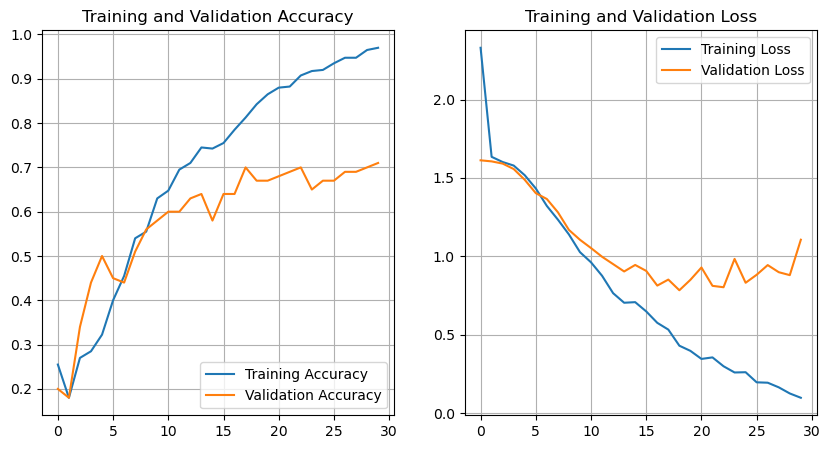

In [11]:
plot_hist(history)

In [12]:
import matplotlib.pyplot as plt
from PIL import Image
import cv2
#from sklearn.metrics import classification_report, confusion_matrix


In [13]:
def pipeline(path):
    img = cv2.imread(path)
    img = cv2.resize(img, (224,224))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    data = (np.array(img).reshape(-1,224,224,3))
    pred = model.predict(data)
    return pred[0]

In [14]:

test_path = "/Users/adityavs14/Documents/Internship/Pianalytix/Month_2/MusicSpectrometer/ML_model/Data/images_original/blues/blues00032.png"

[9.9974328e-01 2.4790028e-05 2.1508073e-04 1.5589063e-05 1.2472826e-06]
blues


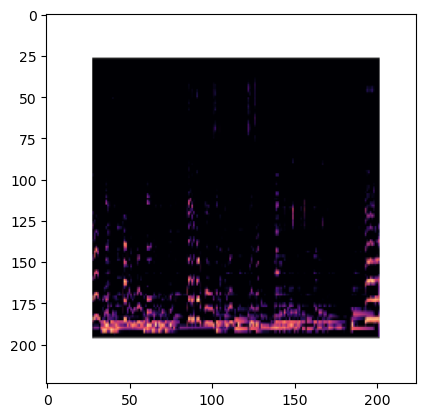

In [15]:
out = pipeline(test_path)
print(out)
print(class_names[np.argmax(out)])

In [16]:
model.save('music.h5')